# # Bitcoin price prediction - Data Exploration, ARIMA time series, and LSTM Recurrent Neural Networks

# Data Exploration

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Narissa-Sh/test-repo/master/bitcoin_v1.csv'
data = pd.read_csv(url, na_filter=False)



In [2]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
plt.rcParams['figure.figsize'] = (17, 4)
plt.rcParams['font.size'] = 14

In [3]:
data[1800:-1]

,Date,Open,High,Low,Last,Vol,Diff,Hash,LS,LS_TH_S,LS_P,LS_MWh_TH,HS,HS_TH_S,HS_P,HS_MWh_TH,UK_EP,US_EP,AUS_EP,RU_EP
1800,2017-03-27,959.08,1043.00,952.95,1039.92,79080569.24,475705205061,3925474.045,S7,4.73,479.95,0.9,S9,13.5,2280.0,0.3528,52.346010,27.96688,75.92155,18.0333
1801,2017-03-28,1039.09,1068.26,1014.90,1043.99,79080569.24,475705205061,3665352.271,S7,4.73,479.95,0.9,S9,13.5,2280.0,0.3528,49.792000,28.59125,78.787826,17.1052
1802,2017-03-29,1042.83,1059.43,1008.16,1035.96,61677763.73,475705205061,3665352.271,S7,4.73,479.95,0.9,S9,13.5,2280.0,0.3528,47.863200,28.11250,97.531907,17.4938
1803,2017-03-30,1037.29,1050.17,1017.14,1033.70,61677763.73,482855238677,4073274.033,S7,4.73,479.95,0.9,S9,13.5,2280.0,0.3528,49.860000,29.52563,85.6444,17.3662
1804,2017-03-31,1033.79,1081.00,1031.43,1070.31,75018988.17,482855238677,4073274.033,S7,4.73,479.95,0.9,S9,13.5,2280.0,0.3528,51.283960,31.34000,75.837576,16.9233
1805,2017-04-01,1071.34,1097.00,1061.64,1083.94,75018988.17,499635929816,3278488.856,S7,4.73,479.95,0.9,S9,13.5,2280.0,0.3528,51.283960,24.64500,78.919288,17.4338
1806,2017-04-02,1083.95,1100.00,1066.49,1078.01,59295644.26,499635929816,3278488.856,S7,4.73,479.95,0.9,S9,13.5,2280.0,0.3528,51.283960,24.76937,70.070808,19.1728
1807,2017-04-03,1076.59,1152.00,1076.19,1144.77,59295644.26,499635929816,4371318.475,S7,4.73,479.95,0.9,S9,13.5,2280.0,0.3528,50.755590,29.59562,76.785302,18.9957
1808,2017-04-04,1146.42,1162.93,1118.85,1143.00,67370298.18,499635929816,4371318.475,S7,4.73,479.95,0.9,S9,13.5,2280.0,0.3528,53.176725,26.35250,83.04174,18.9614
1809,2017-04-05,1143.00,1145.00,1111.00,1134.58,67370298.18,499635929816,4023599.960,S7,4.73,479.95,0.9,S9,13.5,2280.0,0.3528,55.161600,29.02312,105.137136,18.0428


In [4]:
#Index data,http://pandas.pydata.org/pandas-docs/stable/timeseries.html 

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data['Year'] = data.index.year
data['Month'] = data.index.month


In [5]:
data.head()

,Open,High,Low,Last,Vol,Diff,Hash,LS,LS_TH_S,LS_P,...,HS,HS_TH_S,HS_P,HS_MWh_TH,UK_EP,US_EP,AUS_EP,RU_EP,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2012-04-19,5.17,5.18,5.06,5.13,288111.6243,1577913,12.236407,S0,0.09,149.5,...,S0+,0.5,1129.5,7.56,73.481478,28.19,39.0783727,30.0426,2012,4
2012-04-20,5.15,5.38,5.09,5.38,288111.6243,1577913,12.236407,S0,0.09,149.5,...,S0+,0.5,1129.5,7.56,73.041720,28.45,45.4834287,29.5864,2012,4
2012-04-21,5.40,5.43,5.19,5.24,336827.7813,1577913,11.530460,S0,0.09,149.5,...,S0+,0.5,1129.5,7.56,73.041720,26.10,36.9784395,30.5039,2012,4
2012-04-22,5.24,5.25,5.17,5.17,336827.7813,1577913,11.530460,S0,0.09,149.5,...,S0+,0.5,1129.5,7.56,73.041720,27.02,30.5841321,25.7296,2012,4
2012-04-23,5.20,5.25,5.00,5.00,279236.4544,1577913,11.608899,S0,0.09,149.5,...,S0+,0.5,1129.5,7.56,74.744010,32.00,38.192742,30.6223,2012,4


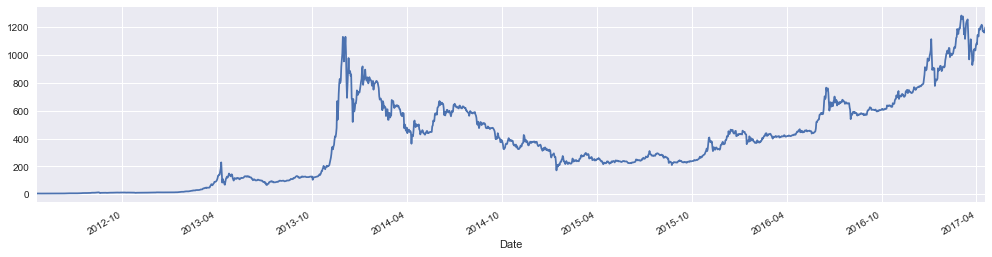

In [6]:
data.Last.plot()

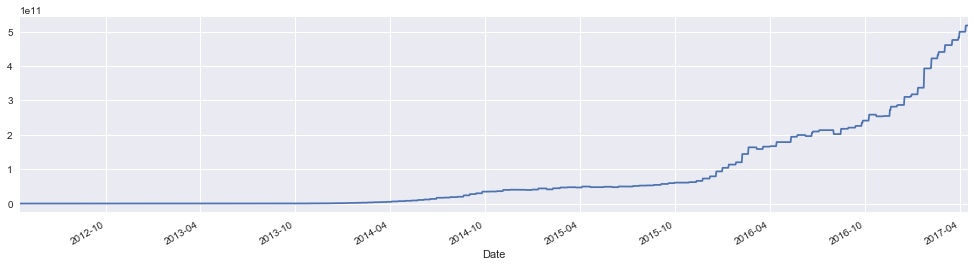

In [7]:
data.Diff.plot()

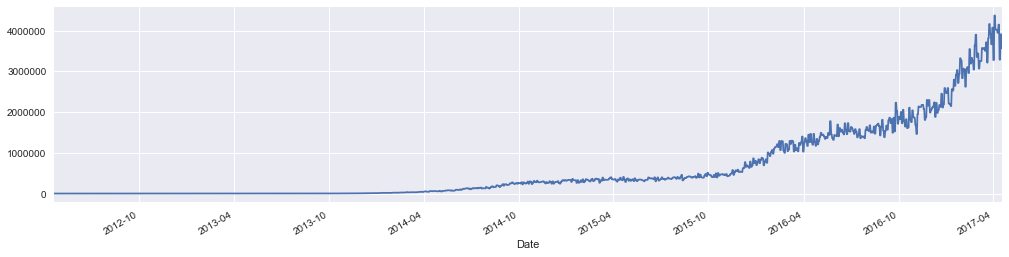

In [8]:
data.Hash.plot()

In [9]:
# Trend in 2016 only 
data_2016 = data[data.Year == 2016]

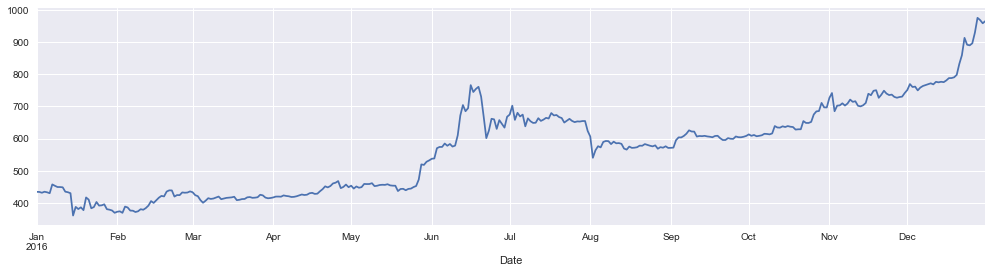

In [10]:
data_2016.Last.plot()

In [11]:
# Autocorrelation (1 day and 365 day)
# Model with high autocorrelation implies that data is highly dependent on previous values => autoregressive model would perform well
data['Last'].resample('D').mean().autocorr(lag=1)

0.99736776309179975

In [12]:
data['Last'].resample('D').mean().autocorr(lag=365)

-0.026137235760321745

In [13]:
#Resample, calculate median and mean, group by month 
data[['Last']].resample('M').apply(['median','mean']).head()

Last           
            median       mean
Date                         
2012-04-30   5.060   5.078333
2012-05-31   5.060   5.039677
2012-06-30   6.125   5.989667
2012-07-31   8.300   7.859677
2012-08-31  10.780  10.877097

In [14]:
#Rolling average 7 days
data[['Last']].resample('D').mean().rolling(window=7, center=True).mean().head(10)
                                                                            

,Last
Date,
2012-04-19,NaN
2012-04-20,NaN
2012-04-21,NaN
2012-04-22,5.162857
2012-04-23,5.135714
2012-04-24,5.087143
2012-04-25,5.040000
2012-04-26,5.002857
2012-04-27,5.002857


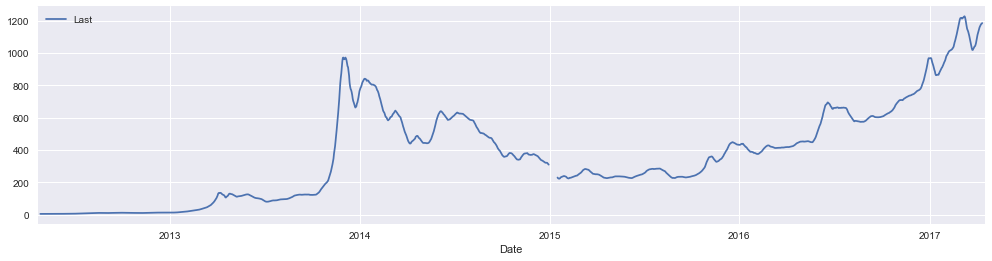

In [15]:
#Plot rolling average, 14 days, smooth random changes, remove outliers, remove large trend
data[['Last']].resample('D').mean().rolling(window=14, center=True).mean().plot()

In [16]:
#diff function - window n 
#Diff is similar to detrending? 
Data['Last'].diff(periods=1).head(10)

Date
2012-04-19     NaN
2012-04-20    0.25
2012-04-21   -0.14
2012-04-22   -0.07
2012-04-23   -0.17
2012-04-24    0.08
2012-04-25    0.06
2012-04-26   -0.20
2012-04-27    0.10
2012-04-28   -0.13
Name: Last, dtype: float64

In [17]:
#expand function
data[['Last']].resample('D').mean().expanding().mean().head()

,Last
Date,
2012-04-19,5.130
2012-04-20,5.255
2012-04-21,5.250
2012-04-22,5.230
2012-04-23,5.184


In [19]:
# Identify the date with largest drop in price from the same date in the previous month

average_daily_last = data[['Last']].resample('D').mean()
average_daily_last['DiffVsLastWeek'] = average_daily_last[['Last']].diff(periods=7)
average_daily_last.sort_values(by='DiffVsLastWeek').head(15)                                                    

,Last,DiffVsLastWeek
Date,,
2013-12-07,693.30,-426.22
2013-12-18,519.86,-359.18
2017-01-11,778.62,-336.30
2013-12-06,814.91,-317.08
2013-12-17,673.62,-305.61
2013-12-20,610.00,-275.98
2013-12-21,595.03,-255.75
2013-12-11,879.04,-252.97
2013-12-22,612.66,-249.34


In [20]:
#price correlation wiht pior week, a week earlier, 4 weeks earlier and 1 year earlier
average_weekly_last = data[['Last']].resample('W').mean()

print('Correlation with last day: {}'.format(average_weekly_last['Last'].autocorr(lag=1)))
print('Correlation with last day: {}'.format(average_weekly_last['Last'].autocorr(lag=4)))
print('Correlation with last day: {}'.format(average_weekly_last['Last'].autocorr(lag=52)))

Correlation with last day: 0.988093713769
Correlation with last day: 0.932231852951
Correlation with last day: -0.0163816400346


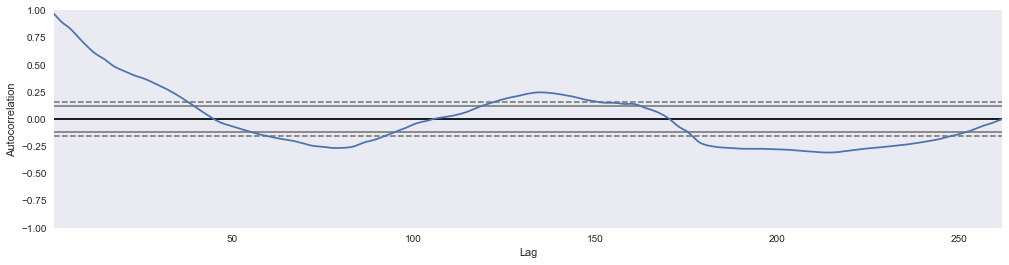

In [21]:
#plot autocorr
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(average_weekly_last['Last'])

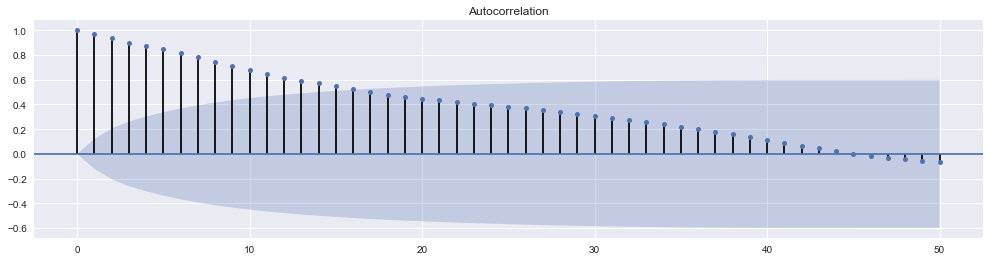

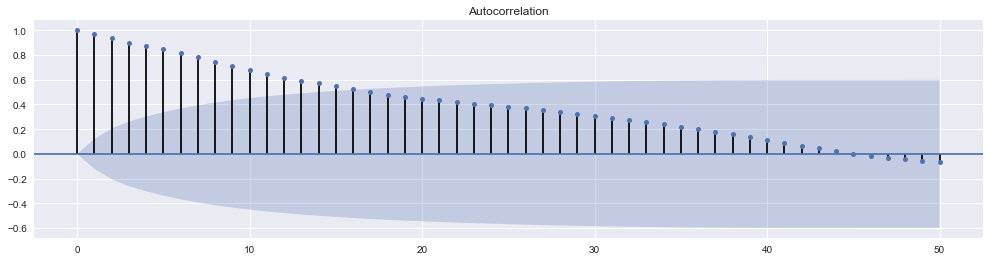

In [22]:
# Autocorrelation 
# ACF is “decaying”, or decreasing, remains well above the significance range (blue area). This is indicative of a non-stationary series.
# Interpreation? 
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(average_weekly_last['Last'], lags=50)

In [23]:
# Split the weekly sales data in a training and test set - using 75% of the data for training
n = len(average_weekly_last.Last)

train = average_weekly_last.Last[:int(.75*n)]
test = average_weekly_last.Last[int(.75*n):]

# ARIMA Model 

In [24]:
#Create an AR(1) model on the training data
#AR(p) learns regression coeff for each of the p previous value. p indicates number of previous time points to incorporate, AR(1)is the most common. Good for falls/rises in the series
#MA(q) regress each y from the last q errors, model takes the mean value of the series and randomly umps around it. Good for handling specific or abrupt changes in the series
#ARMA(p,q) combines two models 
#ARIMA(p,q,d) - d:degree of differencing. 'Diff' converts the series to a stationary one
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [25]:
#AR(1) model # To compute Mean absolute error

model = sm.tsa.ARIMA(train, (1, 0, 0)).fit()
print model.summary()
#http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/
#http://www.statsmodels.org/devel/examples/notebooks/generated/tsa_arma_0.html

                              ARMA Model Results                              
Dep. Variable:                   Last   No. Observations:                  196
Model:                     ARMA(1, 0)   Log Likelihood               -1026.611
Method:                       css-mle   S.D. of innovations             45.178
Date:                Sat, 13 May 2017   AIC                           2059.221
Time:                        13:20:08   BIC                           2069.056
Sample:                    04-22-2012   HQIC                          2063.203
                         - 01-17-2016                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        248.9663    133.193      1.869      0.063       -12.088   510.021
ar.L1.Last     0.9802      0.012     78.599      0.000         0.956     1.005
                                    Roots           

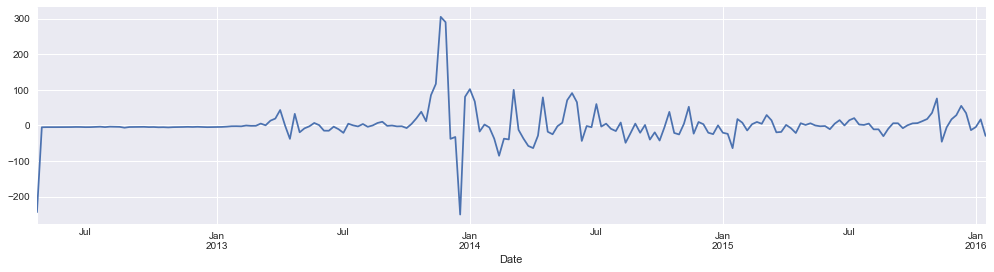

In [26]:
model.resid.plot()

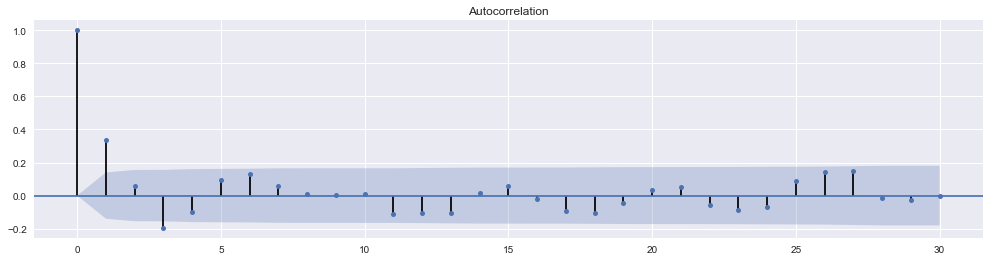

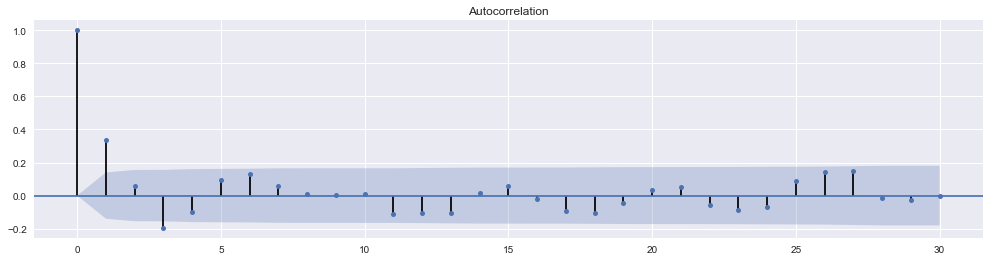

In [27]:
plot_acf(model.resid, lags=30)

In [28]:
model = sm.tsa.ARIMA(train, (2, 0, 0)).fit()
print model.summary()

                              ARMA Model Results                              
Dep. Variable:                   Last   No. Observations:                  196
Model:                     ARMA(2, 0)   Log Likelihood               -1010.218
Method:                       css-mle   S.D. of innovations             41.516
Date:                Sat, 13 May 2017   AIC                           2028.435
Time:                        13:20:09   BIC                           2041.548
Sample:                    04-22-2012   HQIC                          2033.744
                         - 01-17-2016                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        256.4020     98.773      2.596      0.010        62.810   449.994
ar.L1.Last     1.3654      0.065     20.905      0.000         1.237     1.493
ar.L2.Last    -0.3926      0.066     -5.987      0.0

In [29]:
model = sm.tsa.ARIMA(train, (2, 0, 2)).fit()
print model.summary()

                              ARMA Model Results                              
Dep. Variable:                   Last   No. Observations:                  196
Model:                     ARMA(2, 2)   Log Likelihood               -1004.162
Method:                       css-mle   S.D. of innovations             40.222
Date:                Sat, 13 May 2017   AIC                           2020.324
Time:                        13:20:09   BIC                           2039.993
Sample:                    04-22-2012   HQIC                          2028.287
                         - 01-17-2016                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        256.4930     95.825      2.677      0.008        68.679   444.307
ar.L1.Last     0.8920      0.150      5.955      0.000         0.598     1.186
ar.L2.Last     0.0557      0.148      0.375      0.7

In [30]:
model = sm.tsa.ARIMA(train, (2, 1, 3)).fit()
print model.summary()

                             ARIMA Model Results                              
Dep. Variable:                 D.Last   No. Observations:                  195
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -991.570
Method:                       css-mle   S.D. of innovations             39.016
Date:                Sat, 13 May 2017   AIC                           1997.141
Time:                        13:20:09   BIC                           2020.052
Sample:                    04-29-2012   HQIC                          2006.417
                         - 01-17-2016                                         
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const            1.9850      3.864      0.514      0.608        -5.588     9.558
ar.L1.D.Last     0.4208      0.139      3.023      0.003         0.148     0.694
ar.L2.D.Last    -0.6223      0.131     -4.75

# LSTM Recurrent Neural Networks - For regression
Long Short-Term Memory network or LSTM network 

https://deeplearning4j.org/lstm.html 
http://colah.github.io/posts/2015-08-Understanding-LSTMs/
http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

=> t and t+1 (to be predicted)

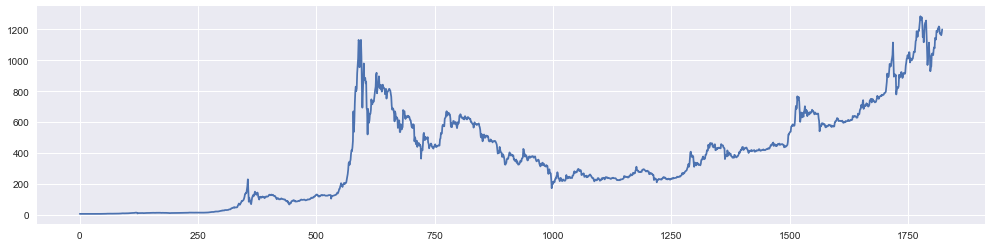

In [6]:
# All data (2012 - 2017)
import pandas as pd
import matplotlib.pyplot as plt
url = 'bitcoin_v4.csv'
data = pd.read_csv(url, usecols=[1],engine='python', na_filter=False)
%matplotlib inline
plt.rcParams['figure.figsize'] = (17, 4)
plt.rcParams['font.size'] = 14
plt.plot(data)
plt.show()


In [7]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [8]:
# define function to create new data set, price at t column and t+1 (next month) to be predicted
# dataset; NumPy array
# look_back; number of previous time steps to use as input variables to predict the next period - default to 1
# Create data set where X is the price at a given time (t) and Y is the price at (t+1)
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [9]:
# fix random seed for reproducibility
# http://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do
numpy.random.seed(7)

In [10]:
# extract the NumPy array from the dataframe
# convert the integer values to floating point values - more suitable for neural network
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.values.html
dataframe = pandas.read_csv('bitcoin_v4.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [11]:
# normalize the dataset, rescale the data to the range of 0-to-1,
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [12]:
# split the ordered dataset into train and test datasets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(1221, 602)


In [13]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [14]:
# LSTM network expects input data (X) in array structure of: [samples, time steps, features]
# our data is [samples, features] 
# need to reshape input using numpy.reshape() 
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 2012-2017 all data 
Try with 10 Epochs, batch size 1

In [15]:
# create and fit the LSTM network
# network has a visible layer with 1 input, hidden layer with 4 LSTM blocks/neurons
# output layer makes a single value prediction
# default sigmoid activation function used for LSTM block
# train 10 epochs with batch size of 1 
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
17s - loss: 0.0130
Epoch 2/10
18s - loss: 5.8938e-04
Epoch 3/10
18s - loss: 4.6733e-04
Epoch 4/10
22s - loss: 4.3082e-04
Epoch 5/10
19s - loss: 3.9331e-04
Epoch 6/10
17s - loss: 3.7502e-04
Epoch 7/10
21s - loss: 3.5534e-04
Epoch 8/10
18s - loss: 3.3355e-04
Epoch 9/10
16s - loss: 3.3368e-04
Epoch 10/10
16s - loss: 3.2371e-04


In [16]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [17]:
# invert the prediction before calculating error scores
# to ensure that performance is reported in the same units as original data 
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [18]:
# calculate root mean squared error RMSE= Square root of [ 1n∑i=1n(yi−y^i)2 ]
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 21.87 RMSE
Test Score: 22.20 RMSE


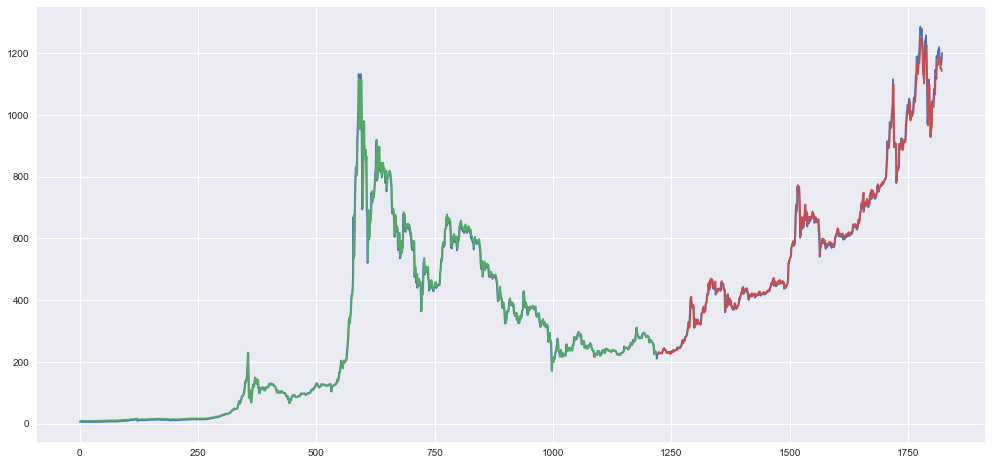

In [19]:
# to get visual indication of model, need to shift the predictions to they align on x-axis with original data set 
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.rcParams['figure.figsize'] = (17, 8)
plt.rcParams['font.size'] = 14
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# 6 months data
10 Epochs, batch size 1 

Epoch 1/10
1s - loss: 0.0675
Epoch 2/10
1s - loss: 0.0238
Epoch 3/10
1s - loss: 0.0159
Epoch 4/10
1s - loss: 0.0137
Epoch 5/10
1s - loss: 0.0116
Epoch 6/10
1s - loss: 0.0095
Epoch 7/10
1s - loss: 0.0078
Epoch 8/10
1s - loss: 0.0062
Epoch 9/10
1s - loss: 0.0049
Epoch 10/10
1s - loss: 0.0038
Train Score: 38.11 RMSE
Test Score: 55.30 RMSE


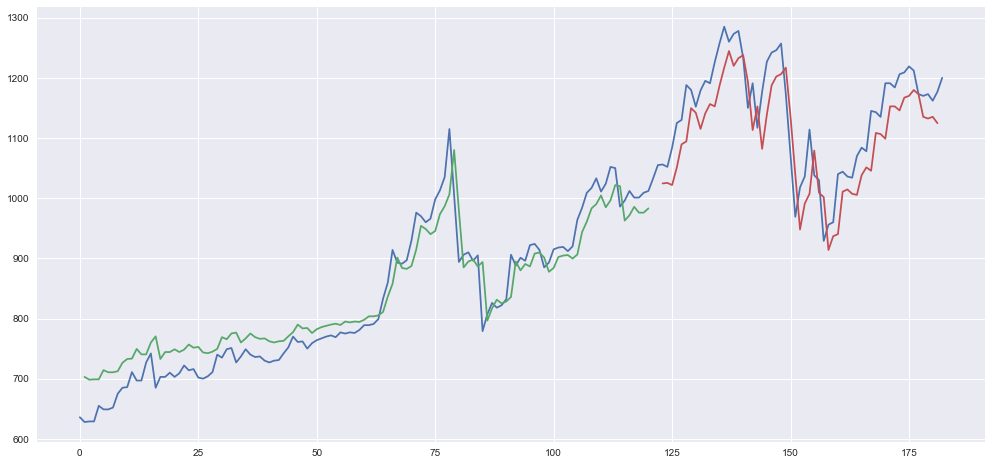

In [20]:
# Try with shorter range, 6 months data 

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

numpy.random.seed(7)

dataframe = pandas.read_csv('bitcoin_v3.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# 6 months data 
50 epochs, batch size 1 

Epoch 1/50
1s - loss: 0.0675
Epoch 2/50
1s - loss: 0.0238
Epoch 3/50
1s - loss: 0.0159
Epoch 4/50
1s - loss: 0.0137
Epoch 5/50
1s - loss: 0.0116
Epoch 6/50
1s - loss: 0.0095
Epoch 7/50
1s - loss: 0.0078
Epoch 8/50
1s - loss: 0.0062
Epoch 9/50
1s - loss: 0.0049
Epoch 10/50
1s - loss: 0.0038
Epoch 11/50
2s - loss: 0.0031
Epoch 12/50
1s - loss: 0.0026
Epoch 13/50
1s - loss: 0.0023
Epoch 14/50
1s - loss: 0.0022
Epoch 15/50
1s - loss: 0.0021
Epoch 16/50
2s - loss: 0.0020
Epoch 17/50
1s - loss: 0.0020
Epoch 18/50
1s - loss: 0.0020
Epoch 19/50
1s - loss: 0.0020
Epoch 20/50
1s - loss: 0.0020
Epoch 21/50
2s - loss: 0.0019
Epoch 22/50
2s - loss: 0.0019
Epoch 23/50
2s - loss: 0.0020
Epoch 24/50
2s - loss: 0.0020
Epoch 25/50
2s - loss: 0.0021
Epoch 26/50
2s - loss: 0.0019
Epoch 27/50
2s - loss: 0.0020
Epoch 28/50
1s - loss: 0.0020
Epoch 29/50
1s - loss: 0.0020
Epoch 30/50
1s - loss: 0.0019
Epoch 31/50
1s - loss: 0.0019
Epoch 32/50
1s - loss: 0.0019
Epoch 33/50
1s - loss: 0.0020
Epoch 34/50
1s - lo

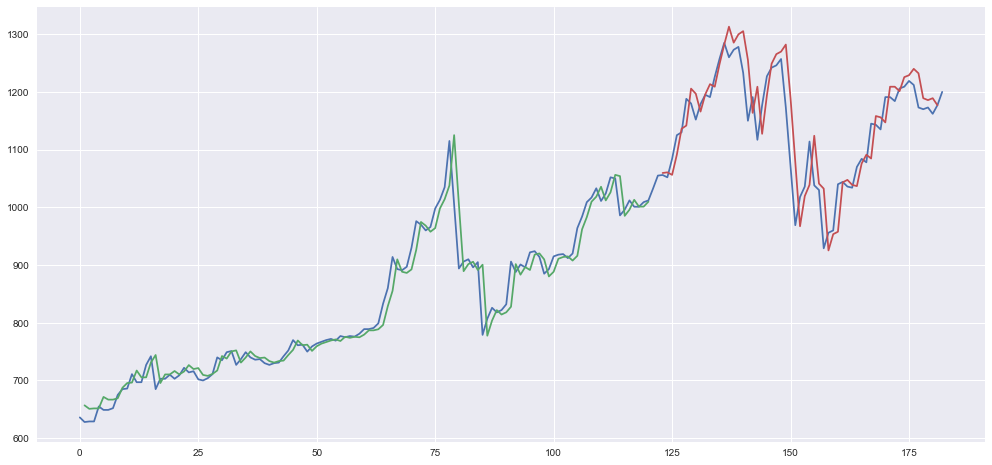

In [21]:


def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

numpy.random.seed(7)

dataframe = pandas.read_csv('bitcoin_v3.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


Epoch 1/300
0s - loss: 0.1015
Epoch 2/300
0s - loss: 0.0886
Epoch 3/300
0s - loss: 0.0767
Epoch 4/300
0s - loss: 0.0660
Epoch 5/300
0s - loss: 0.0565
Epoch 6/300
0s - loss: 0.0478
Epoch 7/300
0s - loss: 0.0408
Epoch 8/300
0s - loss: 0.0345
Epoch 9/300
0s - loss: 0.0296
Epoch 10/300
0s - loss: 0.0255
Epoch 11/300
0s - loss: 0.0225
Epoch 12/300
0s - loss: 0.0202
Epoch 13/300
0s - loss: 0.0185
Epoch 14/300
0s - loss: 0.0172
Epoch 15/300
0s - loss: 0.0164
Epoch 16/300
0s - loss: 0.0157
Epoch 17/300
0s - loss: 0.0152
Epoch 18/300
0s - loss: 0.0148
Epoch 19/300
0s - loss: 0.0144
Epoch 20/300
0s - loss: 0.0141
Epoch 21/300
0s - loss: 0.0138
Epoch 22/300
0s - loss: 0.0135
Epoch 23/300
0s - loss: 0.0131
Epoch 24/300
0s - loss: 0.0128
Epoch 25/300
0s - loss: 0.0125
Epoch 26/300
0s - loss: 0.0122
Epoch 27/300
0s - loss: 0.0118
Epoch 28/300
0s - loss: 0.0115
Epoch 29/300
0s - loss: 0.0112
Epoch 30/300
0s - loss: 0.0109
Epoch 31/300
0s - loss: 0.0105
Epoch 32/300
0s - loss: 0.0102
Epoch 33/300
0s -

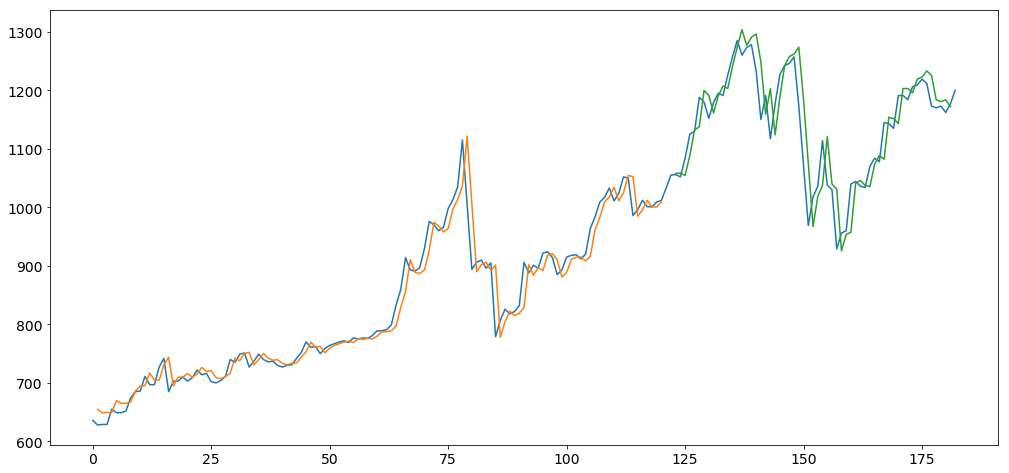

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

numpy.random.seed(7)

dataframe = pandas.read_csv('bitcoin_v3.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=300, batch_size=10, verbose=2)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.rcParams['figure.figsize'] = (17, 8)
plt.rcParams['font.size'] = 14

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# All data - try 300 epochs, batch size 10 - result doesn't really improve

Epoch 1/300
2s - loss: 0.0368
Epoch 2/300
2s - loss: 0.0182
Epoch 3/300
2s - loss: 0.0118
Epoch 4/300
3s - loss: 0.0062
Epoch 5/300
2s - loss: 0.0025
Epoch 6/300
3s - loss: 9.5839e-04
Epoch 7/300
2s - loss: 5.8735e-04
Epoch 8/300
2s - loss: 5.3059e-04
Epoch 9/300
2s - loss: 5.1777e-04
Epoch 10/300
2s - loss: 5.0420e-04
Epoch 11/300
2s - loss: 4.9276e-04
Epoch 12/300
2s - loss: 4.8531e-04
Epoch 13/300
2s - loss: 4.7881e-04
Epoch 14/300
2s - loss: 4.6268e-04
Epoch 15/300
2s - loss: 4.4969e-04
Epoch 16/300
2s - loss: 4.4247e-04
Epoch 17/300
2s - loss: 4.2915e-04
Epoch 18/300
2s - loss: 4.2107e-04
Epoch 19/300
2s - loss: 4.1091e-04
Epoch 20/300
2s - loss: 4.0728e-04
Epoch 21/300
2s - loss: 3.9437e-04
Epoch 22/300
2s - loss: 3.8539e-04
Epoch 23/300
2s - loss: 3.7256e-04
Epoch 24/300
2s - loss: 3.6860e-04
Epoch 25/300
2s - loss: 3.6140e-04
Epoch 26/300
2s - loss: 3.4882e-04
Epoch 27/300
2s - loss: 3.4809e-04
Epoch 28/300
2s - loss: 3.3700e-04
Epoch 29/300
2s - loss: 3.3442e-04
Epoch 30/300
2

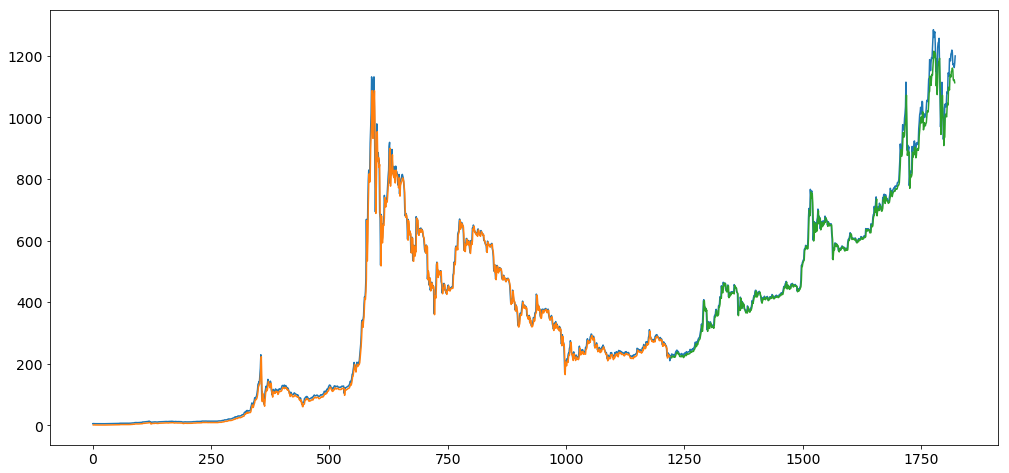

In [5]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

numpy.random.seed(7)

dataframe = pandas.read_csv('bitcoin_v4.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=300, batch_size=10, verbose=2)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.rcParams['figure.figsize'] = (17, 8)
plt.rcParams['font.size'] = 14

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# LSTM for Regression using Window Method

=> Input t, t-1, t-2 to predict the output variable t+1 
=> look_back = 3, epochs = 100, size = 1


Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


Epoch 1/100
18s - loss: 0.0164
Epoch 2/100
17s - loss: 6.5795e-04
Epoch 3/100
16s - loss: 5.3228e-04
Epoch 4/100
16s - loss: 4.6249e-04
Epoch 5/100
17s - loss: 4.4288e-04
Epoch 6/100
16s - loss: 4.2755e-04
Epoch 7/100
17s - loss: 4.2427e-04
Epoch 8/100
17s - loss: 4.0262e-04
Epoch 9/100
17s - loss: 4.0007e-04
Epoch 10/100
17s - loss: 3.8635e-04
Epoch 11/100
17s - loss: 3.8450e-04
Epoch 12/100
17s - loss: 3.8285e-04
Epoch 13/100
16s - loss: 3.7863e-04
Epoch 14/100
17s - loss: 3.8371e-04
Epoch 15/100
17s - loss: 3.8084e-04
Epoch 16/100
16s - loss: 3.6940e-04
Epoch 17/100
17s - loss: 3.6945e-04
Epoch 18/100
17s - loss: 3.7433e-04
Epoch 19/100
17s - loss: 3.5276e-04
Epoch 20/100
17s - loss: 3.6927e-04
Epoch 21/100
17s - loss: 3.7023e-04
Epoch 22/100
17s - loss: 3.5556e-04
Epoch 23/100
16s - loss: 3.6004e-04
Epoch 24/100
16s - loss: 3.4144e-04
Epoch 25/100
16s - loss: 3.5095e-04
Epoch 26/100
17s - loss: 3.5164e-04
Epoch 27/100
16s - loss: 3.4432e-04
Epoch 28/100
16s - loss: 3.5530e-04
Epoch

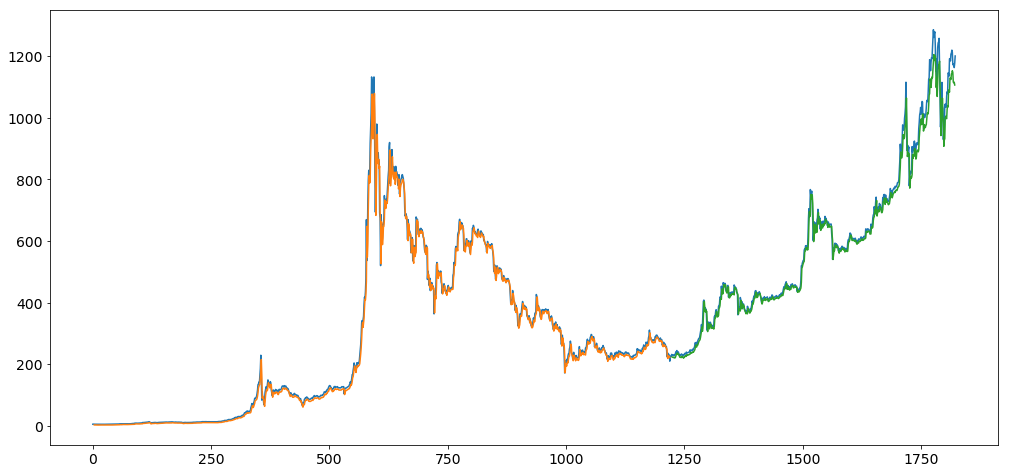

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

numpy.random.seed(7)
dataframe = pandas.read_csv('bitcoin_v4.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.rcParams['figure.figsize'] = (17, 8)
plt.rcParams['font.size'] = 14
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# LSTM for Regression with Time Steps 

Instead of phrasing the past observations as separate input features, we can use them as time steps of the one input feature, which is indeed a more accurate framing of the problem.

We can do this using the same data representation as in the previous window-based example, except when we reshape the data, we set the columns to be the time steps dimension and change the features dimension back to 1. For example:

=> reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

=> Same => Input t, t-1, t-2 to predict the output variable t+1 
=> look_back = 3, epochs = 100, size = 1


Epoch 1/100
22s - loss: 0.0053
Epoch 2/100
19s - loss: 6.0394e-04
Epoch 3/100
20s - loss: 5.2092e-04
Epoch 4/100
20s - loss: 4.7888e-04
Epoch 5/100
20s - loss: 4.7348e-04
Epoch 6/100
20s - loss: 4.4519e-04
Epoch 7/100
22s - loss: 4.6554e-04
Epoch 8/100
21s - loss: 4.4649e-04
Epoch 9/100
26s - loss: 4.4558e-04
Epoch 10/100
21s - loss: 4.3528e-04
Epoch 11/100
20s - loss: 4.5308e-04
Epoch 12/100
20s - loss: 4.4012e-04
Epoch 13/100
22s - loss: 4.3034e-04
Epoch 14/100
21s - loss: 4.2867e-04
Epoch 15/100
21s - loss: 4.1909e-04
Epoch 16/100
20s - loss: 4.2496e-04
Epoch 17/100
22s - loss: 4.1057e-04
Epoch 18/100
23s - loss: 4.2635e-04
Epoch 19/100
20s - loss: 4.1690e-04
Epoch 20/100
20s - loss: 3.9158e-04
Epoch 21/100
19s - loss: 4.0006e-04
Epoch 22/100
19s - loss: 4.1097e-04
Epoch 23/100
19s - loss: 3.9585e-04
Epoch 24/100
18s - loss: 3.7252e-04
Epoch 25/100
18s - loss: 3.9539e-04
Epoch 26/100
18s - loss: 3.7003e-04
Epoch 27/100
18s - loss: 3.4718e-04
Epoch 28/100
18s - loss: 3.6847e-04
Epoch

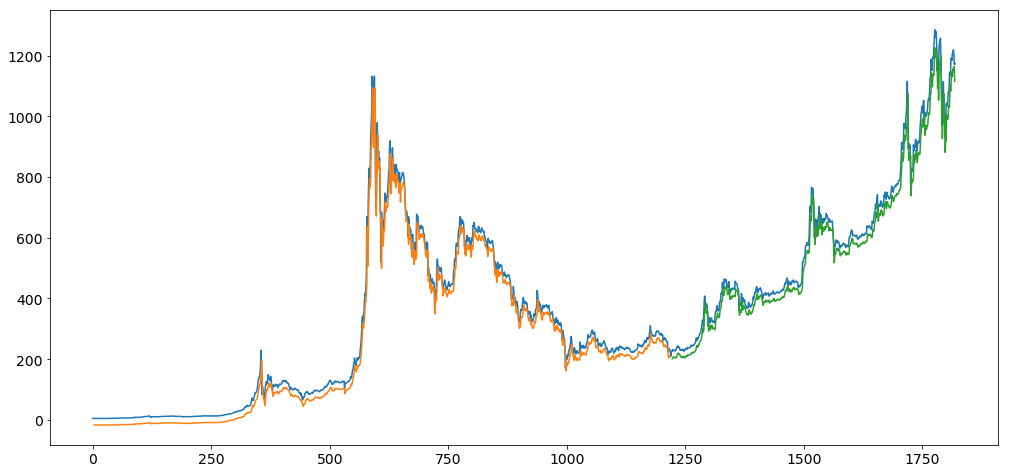

In [5]:
# LSTM for international airline passengers problem with time step regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('bitcoin_v4.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM with Memory Between Batch

-LSTM network can remember across long sequences
-Normally, state within the network is reset after each training batch when fitting the model
-Can gain finer control when internal state of LSTM network is cleared in Keras by making the layer “stateful” => that it can build state over the entire training sequence and maintain that state if needed to make predictions.
-Training data should not be shuffled when fitting the network. 
-Requires explicit resetting of the network state after each exposure to the training data (epoch) by calls to model.reset_states(). This means that we must create our own outer loop of epochs and within each epoch call model.fit() and model.reset_states().

for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

-And when the LSTM layer is constructed, the stateful parameter must be set True and instead of specifying the input dimensions, we must hard code the number of samples in a batch, number of time steps in a sample and number of features in a time step by setting the batch_input_shape parameter.

model.add(LSTM(4, batch_input_shape=(batch_size, time_steps, features), stateful=True))

-This same batch size must then be used later when evaluating the model and making predictions.

model.predict(trainX, batch_size=batch_size)

-We can adapt the previous time step example to use a stateful LSTM. 



Epoch 1/1
19s - loss: 6.3057e-04
Epoch 1/1
22s - loss: 0.0012
Epoch 1/1
19s - loss: 0.0015
Epoch 1/1
19s - loss: 0.0015
Epoch 1/1
19s - loss: 0.0014
Epoch 1/1
19s - loss: 0.0012
Epoch 1/1
19s - loss: 0.0011
Epoch 1/1
19s - loss: 0.0010
Epoch 1/1
19s - loss: 9.7294e-04
Epoch 1/1
19s - loss: 9.1939e-04
Epoch 1/1
19s - loss: 8.7617e-04
Epoch 1/1
20s - loss: 8.3974e-04
Epoch 1/1
19s - loss: 8.0782e-04
Epoch 1/1
19s - loss: 7.7900e-04
Epoch 1/1
19s - loss: 7.5247e-04
Epoch 1/1
19s - loss: 7.2769e-04
Epoch 1/1
22s - loss: 7.0437e-04
Epoch 1/1
20s - loss: 6.8230e-04
Epoch 1/1
21s - loss: 6.6137e-04
Epoch 1/1
23s - loss: 6.4150e-04
Epoch 1/1
22s - loss: 6.2266e-04
Epoch 1/1
20s - loss: 6.0483e-04
Epoch 1/1
19s - loss: 5.8800e-04
Epoch 1/1
20s - loss: 5.7219e-04
Epoch 1/1
19s - loss: 5.5738e-04
Epoch 1/1
21s - loss: 5.4359e-04
Epoch 1/1
22s - loss: 5.3081e-04
Epoch 1/1
23s - loss: 5.1902e-04
Epoch 1/1
19s - loss: 5.0820e-04
Epoch 1/1
20s - loss: 4.9832e-04
Epoch 1/1
22s - loss: 4.8934e-04
Epoch

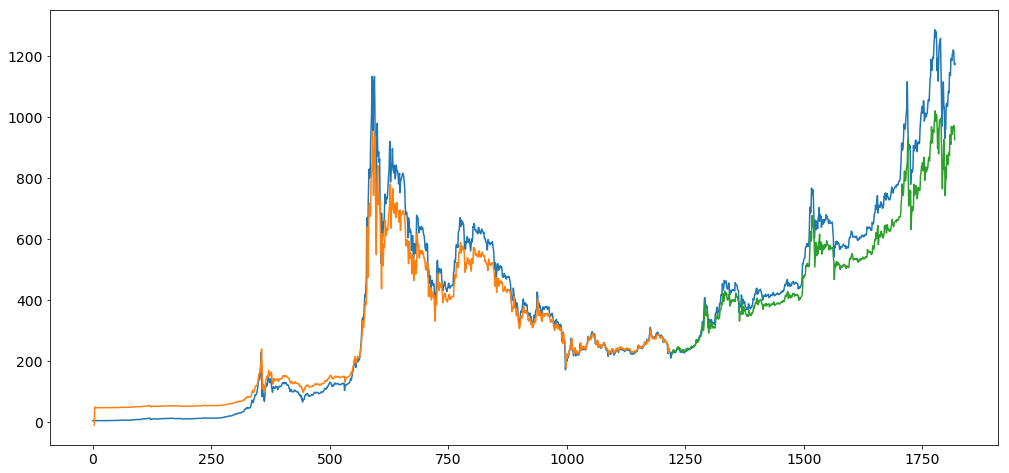

In [ ]:

import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('bitcoin_v4.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Stacked LSTMs with Memory Between Batches

-big benefits of LSTMs: they can be successfully trained when stacked into deep network architectures

-LSTM networks can be stacked in Keras in the same way that other layer types can be stacked. One addition to the configuration that is required is that an LSTM layer prior to each subsequent LSTM layer must return the sequence. This can be done by setting the return_sequences parameter on the layer to True

-Can extend the stateful LSTM in the previous section to have two layers, as follows:

model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))



Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


Epoch 1/1
66s - loss: 9.9407e-04
Epoch 1/1
64s - loss: 0.0026
Epoch 1/1
47s - loss: 0.0035
Epoch 1/1
44s - loss: 0.0038
Epoch 1/1
43s - loss: 0.0036
Epoch 1/1
43s - loss: 0.0033
Epoch 1/1
43s - loss: 0.0028
Epoch 1/1
43s - loss: 0.0025
Epoch 1/1
43s - loss: 0.0022
Epoch 1/1
42s - loss: 0.0020
Epoch 1/1
43s - loss: 0.0018
Epoch 1/1
43s - loss: 0.0017
Epoch 1/1
43s - loss: 0.0015
Epoch 1/1
52s - loss: 0.0014
Epoch 1/1
49s - loss: 0.0013
Epoch 1/1
44s - loss: 0.0013
Epoch 1/1
51s - loss: 0.0012
Epoch 1/1
46s - loss: 0.0011
Epoch 1/1
46s - loss: 0.0010
Epoch 1/1
51s - loss: 9.7206e-04
Epoch 1/1
47s - loss: 9.1360e-04
Epoch 1/1
44s - loss: 8.6295e-04
Epoch 1/1
44s - loss: 8.1258e-04
Epoch 1/1
44s - loss: 7.6821e-04
Epoch 1/1
44s - loss: 7.2507e-04
Epoch 1/1
43s - loss: 6.8681e-04
Epoch 1/1
44s - loss: 6.5265e-04
Epoch 1/1
44s - loss: 6.2409e-04
Epoch 1/1
44s - loss: 6.0067e-04
Epoch 1/1
45s - loss: 5.8160e-04
Epoch 1/1
44s - loss: 5.6625e-04
Epoch 1/1
46s - loss: 5.5344e-04
Epoch 1/1
47s - 

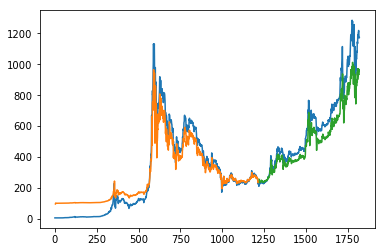

In [1]:

import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('bitcoin_v4.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
